#### PMJ

This notebook contains all the code to test the progressive multi-jittered sequences from Pixar.

In [75]:
import sys
import matplotlib.pyplot as plt
import math
import random as rng
%matplotlib inline

In [76]:
# basic functions that the sampler needs
def generateSamplePt(i, j, xhalf, yhalf, n):
    x = (i + 0.5 * (xhalf * rng.random())) / n
    y = (j + 0.5 * (yhalf * rng.random())) / n
    return (x, y)

In [85]:
# extend sequence function
def extendSequence(N):
    n = int(math.sqrt(N))
    for s in range(0, N):
        
        #print(samples)
        
        oldpt = samples[s]
        i = int(math.floor(n * oldpt[0]))
        j = int(math.floor(n * oldpt[1]))
        
        # xhalf and yhalf are always ints
        xhalf = int(math.floor(2.0 * (n * oldpt[0] - i)))
        yhalf = int(math.floor(2.0 * (n * oldpt[1] - j)))
        
        # first select the diagonally opposite quadrant
        xhalf = 1 - xhalf
        yhalf = 1 - xhalf
        pt = generateSamplePt(i, j, xhalf, yhalf, n);
        print("1st pt : ", pt);
        samples[N + s] = pt
        
        # then randomly select one of the two remaining quadrants
        if rng.random() > 0.5:
            xhalf = 1 - xhalf
        else:
            yhalf = 1 - yhalf
        pt = generateSamplePt(i, j, xhalf, yhalf, n)
        print("2nd pt : ", pt)
        samples[2 * N + s] = pt
        
        # generate the last subquadrant
        xhalf = 1 - xhalf;
        yhalf = 1 - yhalf;
        pt = generateSamplePt(i, j, xhalf, yhalf, n)
        print("3rd pt : ", pt)
        samples[3 * N + s] = pt

In [86]:
# actual procedure to generate sample
def generatePMJ(M):
    samples.append((rng.random(), rng.random()))
    N = 1
    while N < M:
        # allocate space for additional 3N sequences
        for n in range(0, 3 * N):
            samples.append((0, 0))
        extendSequence(N)
        N *= 4

In [87]:
# plotting function
def plotsamples():
    plt.figure(figsize=(10, 10))
    
    x = []
    y = []
    for s in samples:
        x.append(s[0])
        y.append(s[1])
    plt.scatter(x, y)
    plt.show()

1st pt :  (0.0, 0.3431335793164732)
2nd pt :  (0.0, 0.0)
3rd pt :  (0.10958842505890454, 0.04917660198175805)
[(0.9352428599861126, 0.07065821566395303), (0.0, 0.3431335793164732), (0.0, 0.0), (0.10958842505890454, 0.04917660198175805)]


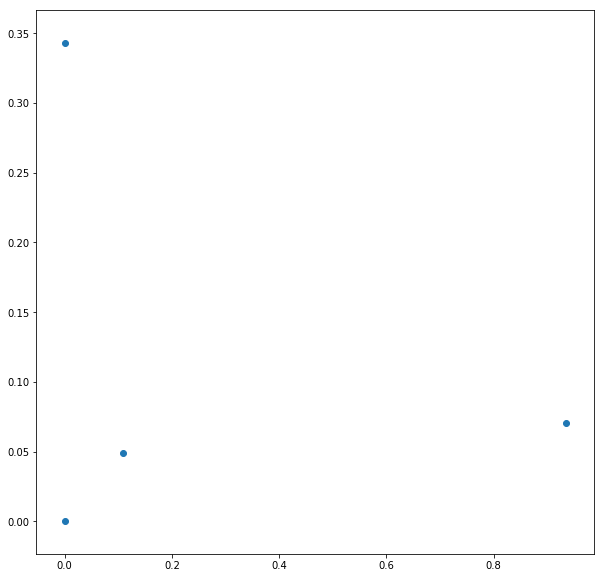

In [89]:
samples = []
generatePMJ(2)
print(samples)
plotsamples()